<img src="./image/25.png">

In [11]:
import numpy as np


def unit_vector(i, length):
    unit_vector = np.zeros((length))
    unit_vector[i] = 1
    return unit_vector
def second_derivative_2psr(cost_function, thetas, i, j):
    alpha = np.pi/3
    scalar_factor = 1/4*(np.sin(alpha)**2)
    length = thetas.shape[0]
    k1 = cost_function(thetas + alpha*(unit_vector(i, length) + unit_vector(j, length)))
    k2 = -cost_function(thetas + alpha*(unit_vector(i, length) - unit_vector(j, length)))
    k3 = -cost_function(thetas - alpha*(unit_vector(i, length) - unit_vector(j, length)))
    k4 = cost_function(thetas - alpha*(unit_vector(i, length) + unit_vector(j, length)))
    return scalar_factor*(k1 + k2 + k3 + k4)

<img src="./image/26.png">

In [12]:
import numpy as np


def second_derivative_4psr(cost_function, thetas, i, j):
    alpha1 = np.pi/2
    alpha2 = np.pi
    d1 = 1j
    d2 = 1j*(-1 + np.sqrt(2)) / 2
    scalar_factor = (-1j/2)**2
    length = thetas.shape[0]

    k1A = -1*(cost_function(thetas + alpha1*unit_vector(i, length) + alpha1*unit_vector(j, length))
    - cost_function(thetas + alpha1*unit_vector(i, length) - alpha1*unit_vector(j, length)))
    k1B = -(1-np.sqrt(2))/2*(cost_function(thetas + alpha1*unit_vector(i, length) + alpha2*unit_vector(j, length))
    - cost_function(thetas + alpha1*unit_vector(i, length) - alpha2*unit_vector(j, length)))

    k2A = 1*(cost_function(thetas - alpha1*unit_vector(i, length) + alpha1*unit_vector(j, length))
    - cost_function(thetas - alpha1*unit_vector(i, length) - alpha1*unit_vector(j, length)))
    k2B = (1-np.sqrt(2))/2*(cost_function(thetas - alpha1*unit_vector(i, length) + alpha2*unit_vector(j, length))
    - cost_function(thetas - alpha1*unit_vector(i, length) - alpha2*unit_vector(j, length)))

    
    k3A = -(1-np.sqrt(2))/2*(cost_function(thetas + alpha2*unit_vector(i, length) + alpha1*unit_vector(j, length))
    - cost_function(thetas + alpha2*unit_vector(i, length) - alpha1*unit_vector(j, length)))
    k3B = -(1-np.sqrt(2))**2/4*(cost_function(thetas + alpha2*unit_vector(i, length) + alpha2*unit_vector(j, length))
    + cost_function(thetas + alpha2*unit_vector(i, length) - alpha2*unit_vector(j, length)))

    k4A = (1-np.sqrt(2))/2*(cost_function(thetas - alpha2*unit_vector(i, length) + alpha1*unit_vector(j, length))
    - cost_function(thetas - alpha2*unit_vector(i, length) - alpha1*unit_vector(j, length)))
    k4B = (1-np.sqrt(2))**2/4*(cost_function(thetas - alpha2*unit_vector(i, length) + alpha2*unit_vector(j, length))
    + cost_function(thetas - alpha2*unit_vector(i, length) - alpha2*unit_vector(j, length)))

    return scalar_factor*(k1A + k1B + k2A + k2B + k3A + k3B + k4A + k4B)

<img src="./image/27.png">

<img src="./image/28.png">

In [16]:
import qiskit, numpy as np
import base
# thetas_origin = np.random.uniform(low=0, high=2*np.pi, size=(3,))
thetas_origin = np.array([np.pi/2, np.pi/3, np.pi/4])
thetas_x, thetas_z, thetas_y = thetas_origin
def u(qc, thetas):
    qc.rx(thetas[0], 0)
    qc.rz(thetas[1], 1)
    qc.cry(thetas[2], 0, 1)
    return qc

def udagger(qc, thetas):
    qc.cry(-thetas[2], 0, 1)
    qc.rz(-thetas[1], 1)
    qc.rx(-thetas[0], 0)
    return qc
def cost_function(thetas):
    qc = qiskit.QuantumCircuit(2,2)
    qc = u(qc, thetas)
    qc = udagger(qc, thetas_origin)
    return base.measure(qc, [0, 1])
    
g = np.zeros((3,3), dtype=np.complex128)
g[0, 0] = -1/2*second_derivative_2psr(cost_function, thetas_origin, 0, 0)
g[2, 2] = -1/2*second_derivative_4psr(cost_function, thetas_origin, 2, 2)
print(1/4*(np.sin(thetas_x/2)**2))
print(g)

0.12500000000000003
[[0.14065969+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.11446854-0.j]]


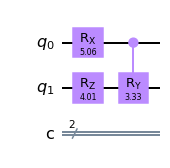

In [19]:
qc = qiskit.QuantumCircuit(2,2)
qc.rx(thetas_origin[0], 0)
qc.rz(thetas_origin[1], 1)
qc.cry(thetas_origin[2], 0, 1)
qc.draw('mpl')

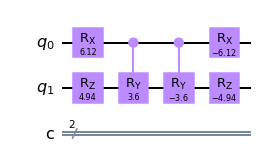

In [26]:
thetas = np.random.uniform(low=0, high=2*np.pi, size=(3,))
qc = qiskit.QuantumCircuit(2,2)
qc = u(qc, thetas_origin)
qc = udagger(qc, thetas_origin)
qc.draw('mpl')